<a href="https://colab.research.google.com/github/xambert/Scalable-ML-using-ApacheSpark/blob/main/SparkCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week -1**

**Ex-1**

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 198 kB 58.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=77f1c0e2e8411d1735234f09443ecb6b42876ca0761e4b89a0f16e4fb95d6f72
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


**SparkContext** : Tells Spark how to access a cluster \\
**SparkConf** : Object that contains information about your application

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

In [ ]:
rdd = sc.parallelize(range(100))

In [ ]:
rdd.count()

100

In [ ]:
rdd.sum()

4950

**Functional Programming - Ex-2**

In [ ]:
def gt50(i):
  return i>50

In [ ]:
gt50 = lambda i : i>50

In [ ]:
from random import shuffle
l = list(range(100))
shuffle(l)
rdd_1 = sc.parallelize(l)

In [ ]:
rdd_1.filter(gt50).take(5)

[86, 58, 94, 95, 64]

In [ ]:
#50<i<75

rdd_1.filter(lambda i : 50<i<75).sum()

1500

**Sql - Ex-3**

In [ ]:


from pyspark.sql import Row

df = spark.createDataFrame([Row(id=1, value='value1'),Row(id=2, value='value2')])

# let's have a look what's inside
df.show()

# let's print the schema
df.printSchema()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



In [ ]:
# register dataframe as query table
df.createOrReplaceTempView('df_view')

# execute SQL query
df_result = spark.sql('select value from df_view where id=2')

# examine contents of result
df_result.show()

# get result as string
df_result.first().value



+------+
| value|
+------+
|value2|
+------+



'value2'

Number of rows in a dataframe

In [ ]:
df.count()

2

**Week 2**

Ex-1

In [6]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2022-03-11 20:32:43--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/raw/master/hmp.parquet [following]
--2022-03-11 20:32:43--  https://github.com/IBM/claimed/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet [following]
--2022-03-11 20:32:44--  https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/oc

In [ ]:
df.show()
df.printSchema()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

In [ ]:
spark.sql('select class,count(*) from df group by class').show()

+--------------+--------+
|         class|count(1)|
+--------------+--------+
| Use_telephone|   15225|
| Standup_chair|   25417|
|      Eat_meat|   31236|
|     Getup_bed|   45801|
|   Drink_glass|   42792|
|    Pour_water|   41673|
|     Comb_hair|   23504|
|          Walk|   92254|
|  Climb_stairs|   40258|
| Sitdown_chair|   25036|
|   Liedown_bed|   11446|
|Descend_stairs|   15375|
|   Brush_teeth|   29829|
|      Eat_soup|    6683|
+--------------+--------+



In [ ]:
df.groupBy('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone|15225|
| Standup_chair|25417|
|      Eat_meat|31236|
|     Getup_bed|45801|
|   Drink_glass|42792|
|    Pour_water|41673|
|     Comb_hair|23504|
|          Walk|92254|
|  Climb_stairs|40258|
| Sitdown_chair|25036|
|   Liedown_bed|11446|
|Descend_stairs|15375|
|   Brush_teeth|29829|
|      Eat_soup| 6683|
+--------------+-----+



In [ ]:
!pip install pixiedust

     |████████████████████████████████| 197 kB 5.0 MB/s 
  Created wheel for pixiedust: filename=pixiedust-1.1.19-py3-none-any.whl size=321805 sha256=cc1e2b4b7940a983d3938a45bb091c9a16291289637527ed8213d700a4039a17
  Stored in directory: /root/.cache/pip/wheels/05/07/e7/8aca0e820027a63157a916424fd748fb2a2a3e71de5e08eeb8
Successfully built pixiedust


In [ ]:
# %maplotlib inline ?
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
counts = df.groupBy('class').count().orderBy('count')
counts.show()


+--------------+-----+
|         class|count|
+--------------+-----+
|      Eat_soup| 6683|
|   Liedown_bed|11446|
| Use_telephone|15225|
|Descend_stairs|15375|
|     Comb_hair|23504|
| Sitdown_chair|25036|
| Standup_chair|25417|
|   Brush_teeth|29829|
|      Eat_meat|31236|
|  Climb_stairs|40258|
|    Pour_water|41673|
|   Drink_glass|42792|
|     Getup_bed|45801|
|          Walk|92254|
+--------------+-----+



In [ ]:
spark.sql('''
    select 
        *,
        max/min as minmaxratio -- compute minmaxratio based on previously computed values
        from (
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )
        )   
''').show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



In [ ]:
from pyspark.sql.functions import col, min, max, mean, stddev

df \
    .groupBy('class') \
    .count() \
    .select([ 
        min(col("count")).alias('min'), 
        max(col("count")).alias('max'), 
        mean(col("count")).alias('mean'), 
        stddev(col("count")).alias('stddev') 
    ]) \
    .select([
        col('*'),
        (col("max") / col("min")).alias('minmaxratio')
    ]) \
    .show()


+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Ex-2

In [ ]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2022-03-04 19:43:00--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2022-03-04 19:43:00--  https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet [following]
--2022-03-04 19:43:00--  https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/coursera_ds/washing.parquet [following]
--2022-03-04 19:43:00

In [ ]:
df = spark.read.parquet('washing.parquet')

In [ ]:
df.count()

2058

In [ ]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [ ]:
result = spark.sql("select voltage from washing where voltage is not null")
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

[230, 234, 235, 221, 233, 223, 232, 239, 229, 227, 234, 231, 233, 227, 250]

In [ ]:
%matplotlib inline

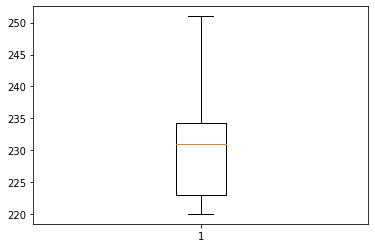

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [ ]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808737926, 1547808776948, 1547808876043, 1547808912091, 1547808975148, 1547809137266, 1547809149271, 1547809158278, 1547809212330, 1547809218332, 1547809221335, 1547809236348, 1547809251354, 1547809311397, 1547809350411]
[234, 235, 221, 236, 238, 226, 232, 226, 237, 220, 235, 236, 231, 252, 236]


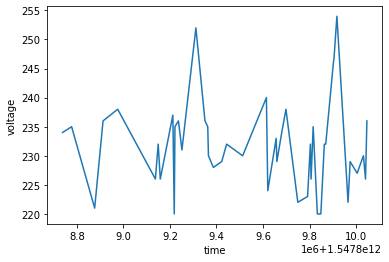

In [ ]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [ ]:
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



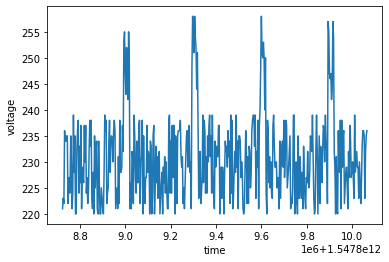

In [ ]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [ ]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

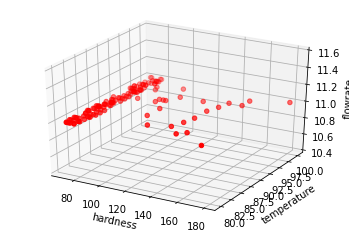

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

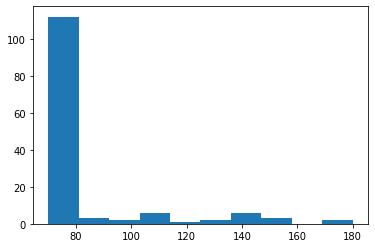

In [ ]:
plt.hist(result_array_hardness)
plt.show()

Week 3


In [ ]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [ ]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

In [ ]:
df.count()-result.count()

7

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


In [ ]:
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

In [ ]:
features = assembler.transform(result)

In [ ]:
features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [ ]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

In [ ]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+----------------------------------------------------------+
|pcaFeatures                                               |
+----------------------------------------------------------+
|[1459.9789705815301,18.745237781813703,70.7843079478946]  |
|[1459.9954818287874,19.113431461685497,70.72738871418585] |
|[1460.0895843562396,20.969471062955694,70.75630600314628] |
|[1469.69939294206,20.40312464764779,62.01356967480217]    |
|[1469.7159041893176,20.771318327519584,61.95665044109353] |
|[1469.712831733977,20.790751117254793,61.89610667824968]  |
|[1478.353026457406,20.29455702976173,71.67550104802774]   |
|[1478.353026457406,20.29455702976173,71.67550104802774]   |
|[1478.3686036139297,20.26062689766929,71.63355353599673]  |
|[1478.3686036139297,20.26062689766929,71.63355353599673]  |
|[1483.5412027685188,20.006222577534132,66.82710394276808] |
|[1483.5171090224458,20.86702042161668,66.86707301946444]  |
|[1483.422426854405,19.87574823668772,66.93027077907936]   |
|[1483.422426854405,19.8

In [ ]:
result_pca.count()

2051

In [ ]:
rdd = result_pca.rdd.sample(False,0.8)


In [ ]:
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

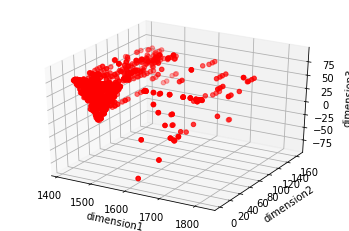

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()

Week 3


ML pipelines


In [7]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer, MinMaxScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

minmaxscaler = MinMaxScaler(inputCol="features", outputCol="features_minmax")

pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer,minmaxscaler])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|     features_minmax|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|[0.34920634920634...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|[0.34920634920634...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|[0.34920634920634...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|[0.34920634920634...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.

In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df)
predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.4020618068072166


ON feature normalized


In [9]:
kmeans = KMeans(featuresCol = "features_norm").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, normalizer ,kmeans])
model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.24303667657985278


Inflating : Eg. x*10

In [10]:
from pyspark.sql.functions import col
df_denormalized = df.select([col('*'),(col('x')*10)]).drop('x').withColumnRenamed('(x * 10)','x')

In [11]:
kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df_denormalized)
predictions = model.transform(df_denormalized)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5867136488435384


In [12]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(featuresCol="features")
pipeline = Pipeline(stages = [vectorAssembler,normalizer, gmm])

model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5714593893099652


*Week 4 : Supervised
*

In [14]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

splits = df.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

--2022-03-11 21:05:22--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/raw/master/hmp.parquet [following]
--2022-03-11 21:05:22--  https://github.com/IBM/claimed/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet [following]
--2022-03-11 21:05:22--  https://raw.githubusercontent.com/IBM/claimed/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/oc

In [15]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer


indexer = StringIndexer(inputCol="class", outputCol="label")

vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [16]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)

In [17]:
prediction.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- z: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- class: string (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- features_norm: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
MulticlassClassificationEvaluator().setMetricName("accuracy").evaluate(prediction) 

0.20697074974784266

In [21]:

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(numTrees=10)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer,rf])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)

In [22]:
MulticlassClassificationEvaluator().setMetricName("accuracy").evaluate(prediction) 

0.43967275579961895

Assignment

In [23]:
# delete files from previous runs
!rm -rf noaa-weather-data-jfk-airport*

# download the file containing the data in CSV format
!wget https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-data-jfk-airport.tar.gz

# extract the data
!tar xvfz noaa-weather-data-jfk-airport.tar.gz noaa-weather-data-jfk-airport/jfk_weather.csv
    
# create a dataframe out of it by using the first row as field names and trying to infer a schema based on contents
df = spark.read.option("header", "true").option("inferSchema","true").csv('noaa-weather-data-jfk-airport/jfk_weather.csv')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2022-03-11 21:15:01--  https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-data-jfk-airport.tar.gz
Resolving dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)... 104.86.99.206, 2600:141b:e800:393::d2d, 2600:141b:e800:387::d2d
Connecting to dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)|104.86.99.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3509993 (3.3M) [application/x-tar]
Saving to: ‘noaa-weather-data-jfk-airport.tar.gz’

noaa-weather-data-j 100%[===================>]   3.35M  --.-KB/s    in 0.07s   

2022-03-11 21:15:01 (45.0 MB/s) - ‘noaa-weather-data-jfk-airport.tar.gz’ saved [3509993/3509993]

noaa-weather-data-jfk-airport/jfk_weather.csv


In [24]:
df.show()

+----------+--------------------+---------+--------+---------+----------------+----------+--------------------+----------------+-----------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+----------------------+---------------+-------------------+-------------------+---------------------+----------------------+--------------------+----------------------+------------+----------------------+-----------------------+-----------------------+-----------------------+------------------------------+----------------------------+------------------------+-----------------------+----------------------+----------------------+------------+-----------+------------+-----------+-------------+--------------+---------------------------+----------------------------+---------------------+------------------+-----------------+-----------------------+---------------------------+------------------+------------------+---------------+

In [25]:
import random
random.seed(42)

from pyspark.sql.functions import translate, col

df_cleaned = df \
    .withColumn("HOURLYWindSpeed", df.HOURLYWindSpeed.cast('double')) \
    .withColumn("HOURLYWindDirection", df.HOURLYWindDirection.cast('double')) \
    .withColumn("HOURLYStationPressure", translate(col("HOURLYStationPressure"), "s,", "")) \
    .withColumn("HOURLYPrecip", translate(col("HOURLYPrecip"), "s,", "")) \
    .withColumn("HOURLYRelativeHumidity", translate(col("HOURLYRelativeHumidity"), "*", "")) \
    .withColumn("HOURLYDRYBULBTEMPC", translate(col("HOURLYDRYBULBTEMPC"), "*", "")) \

df_cleaned =   df_cleaned \
                    .withColumn("HOURLYStationPressure", df_cleaned.HOURLYStationPressure.cast('double')) \
                    .withColumn("HOURLYPrecip", df_cleaned.HOURLYPrecip.cast('double')) \
                    .withColumn("HOURLYRelativeHumidity", df_cleaned.HOURLYRelativeHumidity.cast('double')) \
                    .withColumn("HOURLYDRYBULBTEMPC", df_cleaned.HOURLYDRYBULBTEMPC.cast('double')) \

df_filtered = df_cleaned.filter("""
    HOURLYWindSpeed <> 0
    and HOURLYWindSpeed IS NOT NULL
    and HOURLYWindDirection IS NOT NULL
    and HOURLYStationPressure IS NOT NULL
    and HOURLYPressureTendency IS NOT NULL
    and HOURLYPrecip IS NOT NULL
    and HOURLYRelativeHumidity IS NOT NULL
    and HOURLYDRYBULBTEMPC IS NOT NULL
""")

In [26]:
df_filtered.show()

+----------+--------------------+---------+--------+---------+----------------+----------+--------------------+----------------+-----------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+----------------------+---------------+-------------------+-------------------+---------------------+----------------------+--------------------+----------------------+------------+----------------------+-----------------------+-----------------------+-----------------------+------------------------------+----------------------------+------------------------+-----------------------+----------------------+----------------------+------------+-----------+------------+-----------+-------------+--------------+---------------------------+----------------------------+---------------------+------------------+-----------------+-----------------------+---------------------------+------------------+------------------+---------------+

In [43]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYWindDirection","HOURLYStationPressure"],
                                  outputCol="features")
df_pipeline = vectorAssembler.transform(df_filtered)
from pyspark.ml.stat import Correlation
Correlation.corr(df_pipeline,"features").head()[0].toArray()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


array([[ 1.        ,  0.25478863, -0.26171147],
       [ 0.25478863,  1.        , -0.13377466],
       [-0.26171147, -0.13377466,  1.        ]])

In [44]:
splits = df_filtered.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

In [45]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml import Pipeline

vectorAssembler = VectorAssembler(inputCols=[
                                    "HOURLYWindDirection",
                                    "ELEVATION",
                                    "HOURLYStationPressure"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [46]:
def regression_metrics(prediction):
    from pyspark.ml.evaluation import RegressionEvaluator
    evaluator = RegressionEvaluator(
    labelCol="HOURLYWindSpeed", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(prediction)
    print("RMSE on test data = %g" % rmse)

In [47]:
#LR1

from pyspark.ml.regression import LinearRegression


lr = LinearRegression(labelCol="HOURLYWindSpeed", featuresCol='features', maxIter=100, regParam=0.0, elasticNetParam=0.0)
pipeline = Pipeline(stages=[vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
regression_metrics(prediction)

RMSE on test data = 5.35606


In [50]:
#GBT1

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(labelCol="HOURLYWindSpeed", maxIter=100)
pipeline = Pipeline(stages=[vectorAssembler, normalizer,gbt])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
regression_metrics(prediction)

RMSE on test data = 5.14284


In [33]:
from pyspark.ml.feature import Bucketizer, OneHotEncoder
bucketizer = Bucketizer(splits=[ 0, 180, float('Inf') ],inputCol="HOURLYWindDirection", outputCol="HOURLYWindDirectionBucketized")
encoder = OneHotEncoder(inputCol="HOURLYWindDirectionBucketized", outputCol="HOURLYWindDirectionOHE")

In [34]:
def classification_metrics(prediction):
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    mcEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("HOURLYWindDirectionBucketized")
    accuracy = mcEval.evaluate(prediction)
    print("Accuracy on test data = %g" % accuracy)

In [35]:
#LGReg1

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="HOURLYWindDirectionBucketized", maxIter=10)
#,"ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.681374


In [36]:
#RF1

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="HOURLYWindDirectionBucketized", numTrees=30)

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC","ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,rf])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.71617


In [37]:
#GBT2

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="HOURLYWindDirectionBucketized", maxIter=100)

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC","ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,gbt])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.727087


In [38]:
#q1
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYPressureTendency"],
                                  outputCol="features")
df_pipeline = vectorAssembler.transform(df_filtered)
from pyspark.ml.stat import Correlation
Correlation.corr(df_pipeline,"features").head()[0].toArray()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


array([[ 1.        , -0.01324305],
       [-0.01324305,  1.        ]])

In [49]:
#q2
#LR1

from pyspark.ml.regression import LinearRegression


lr = LinearRegression(labelCol="HOURLYWindSpeed", featuresCol='features_norm', maxIter=100, regParam=0.0, elasticNetParam=0.0)
pipeline = Pipeline(stages=[vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
regression_metrics(prediction)

RMSE on test data = 5.64506


In [41]:
#RF1

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="HOURLYWindDirectionBucketized", numTrees=10)#30->10

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC","ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,rf])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.717307


In [54]:
#Quiz
# your code goes here
import math
l1 = list(map(int,input().split(",")))
l2 = list(map(int,input().split(",")))
mean1 = 1.0 * sum(l1)/len(l1)
mean2 = 1.0 * sum(l2)/len(l2)
bias1 = [x-mean1 for x in l1] 
bias2 = [x-mean2 for x in l2]
var1 = sum([pow(x,2)/len(l1) for x in bias1])
var2 = sum([pow(x,2)/len(l2) for x in bias2])
std1 = pow(var1,0.5)
std2 = pow(var2, 0.5)
cov = 1.0 * sum([x*y for x,y in zip(bias1, bias2)])/len(l1)
print(cov, var1, var2)
corr = round(cov/ (std1 * std2),3)
print(corr)

l = sorted(l1)
n = len(l)
mean = 1.0 * sum(l)/n
print(l,n)
median = 1.0 * (l[n//2] + l[n//2-1])/2
bias = [1.0 * (x - mean) for x in l]
stdlst = [pow(x,2)/(n-1) for x in bias]
kurtlist = [pow(x,4) for x in bias]
skewlist = [pow(x,3) for x in bias]
kurt = sum(kurtlist)
skew = sum(skewlist)
std = math.sqrt(abs(sum(stdlst)))
stdround = round(std,3)
kurt = kurt/(1*n*pow(std,4))
skew = skew/(1*n*pow(std,3))
kurtround = round(kurt,3)
skewround = round(skew, 3)
print(mean,median,stdround,kurtround, skewround)

1,2,3,4,5,6,7,8,9,10
7,6,5,4,5,6,7,8,9,10
3.65 8.25 3.21
0.709
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 10
5.5 5.5 3.028 1.438 0.0
